# Самостоятельное задание

Считать изображение и выполнить:

1. Изменить размер изображения.
2. Определить размер изображения и сдвинуть изображение на 200 столбцов и 100 строк.
3. Определить размер изображения, его центр и повернуть его на 180 градусов.
4. Провести охват изображения в прямоугольник, повернутый так, чтобы площадь этого прямоугольника была минимальной
5. Нарисовать прямоугольник в месте, где нужно вырезать фрагмент, вывести на экран фрагмент, ограниченный прямоугольником, увеличив этот фрагмент.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def img_print(orig, res):
    pose = [121, 122]
    signature = ["Оригинал", "Измененное"]
    img = [orig, res]
    i = 0
    while i < 2:
        plt.subplot(pose[i])
        plt.title(signature[i])
        plt.imshow(img[i])
        i += 1
    return 0

Изменение размера изображения.

In [5]:
img = cv2.imread('image/ind.jpeg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Original Dimensions :  (561, 800, 3)
Resized Dimensions :  (100, 100, 3)


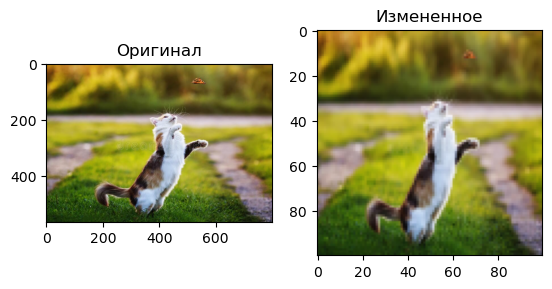

In [9]:
print('Original Dimensions : ',img.shape)
width = 100
height = 100
dim1 = (width, height)

resized1 = cv2.resize(img, dim1, interpolation=cv2.INTER_AREA)
print('Resized Dimensions : ', resized1.shape)
img_print(img, resized1);

Определение размера изображения и сдвиг изображения на 200 столбцов и 100 строк.

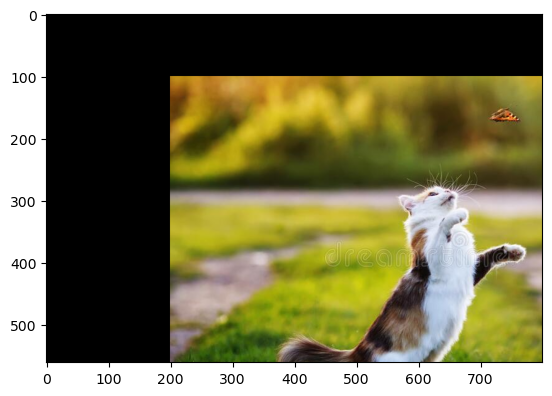

In [10]:
rows,cols,colors = img.shape
M = np.float32([[1,0,200],[0,1,100]])
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst);

Определение размера изображения, его центра и поверот его на 180 градусов.

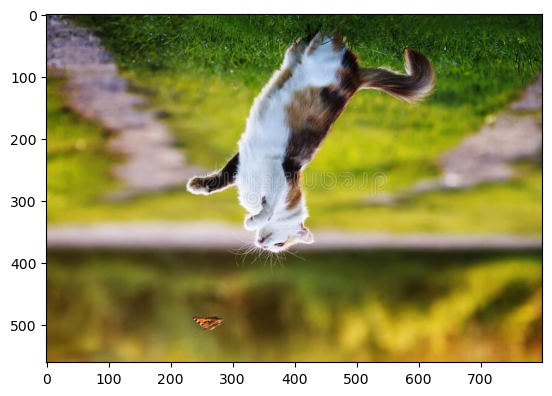

In [13]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst);

Провести охват изображения в прямоугольник, повернутый так, чтобы площадь этого прямоугольника была минимальной

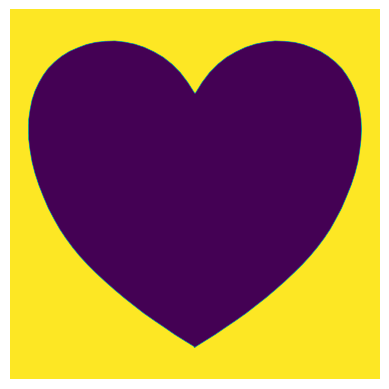

In [51]:
image = cv2.imread('image/ind2.jpeg',0)
plt.axis('off')
plt.imshow(image);

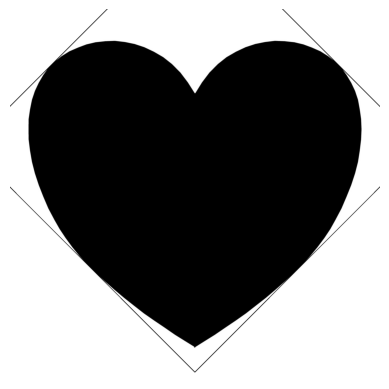

In [52]:
ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 1, 1)

cnt = contours[0]
rect = cv2.minAreaRect(cnt)

box = cv2.boxPoints(rect)
box = np.int0(box)

imp = cv2.drawContours(image, [box], 0, (0, 0, 255), 2)
imp = cv2.cvtColor(imp, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imp);

Нарисовать прямоугольник в месте, где нужно вырезать фрагмент, вывести на экран фрагмент, ограниченный прямоугольником, увеличив этот фрагмент.

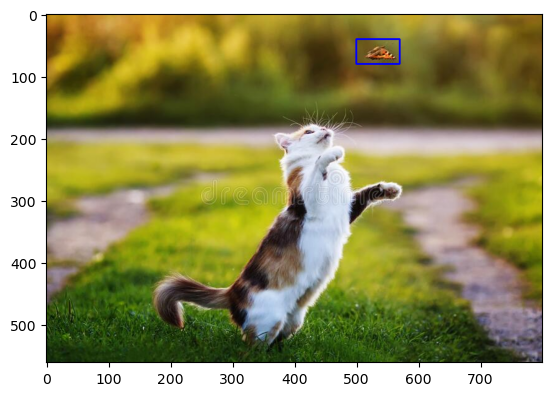

In [42]:
img = cv2.imread('image/ind.jpeg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

image = cv2.rectangle(img, (500, 40), (570, 80), (0, 0, 255), 2)

plt.imshow(image);

200 100


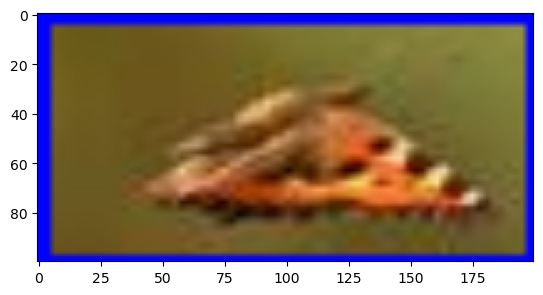

In [45]:
crop = img[40:80, 500:570]
piece = cv2.resize(crop, (200,100), interpolation=cv2.INTER_LINEAR)

(h, w) = piece.shape[:2]
print(w,h)

plt.imshow(piece);